In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv('./data/driving_log.csv', header=None, 
                 names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,0.0,0.000000,0,0.000005
1,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,0.0,0.000000,0,0.000012
2,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,0.0,0.000000,0,0.000008
3,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,0.0,0.000000,0,0.000017
4,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,/Users/mateusztybura/Documents/projects/5-day-...,0.0,0.291675,0,0.329756


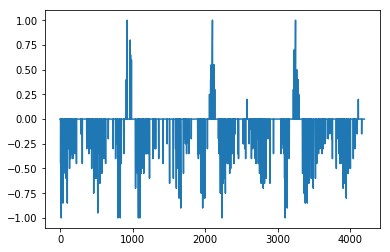

In [14]:
df['steering_angle'].plot()

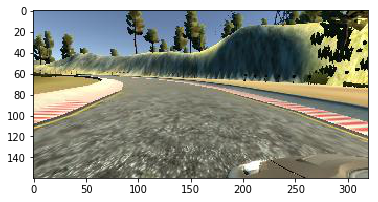

In [16]:
img = Image.open(df['left'][0])
plt.imshow(img)

In [18]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [19]:
def load_image(fname):
    return np.asarray(Image.open(fname))

def process_image(img):
    # 160,320,3  ==> 60,80,3
    return img[10:130:2,::4,:]

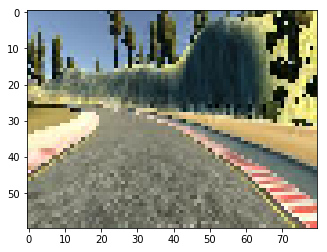

In [20]:
img = process_image(load_image(df['center'][0]))
plt.imshow(img)

In [21]:
X = [process_image(load_image(fname)) for fname in df['center']] 
X += [process_image(load_image(fname)) for fname in df['left']]
X += [process_image(load_image(fname)) for fname in df['right']]

y = df['steering_angle'].values
y = np.concatenate([y ,y+0.4, y-0.4])

In [22]:
X = np.array(X)

(12588,)

In [23]:
print(X.shape)
print(y.shape)

(12588, 60, 80, 3)
(12588,)


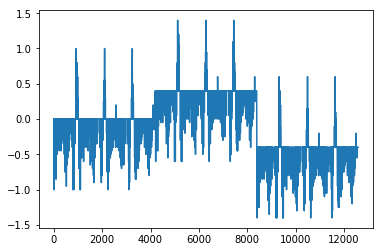

In [24]:
plt.plot(y)
plt.show()

In [25]:
np.save('x.npy',X)
np.save('y.npy',y)